In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
countries = [
    "Argentina",
    "Bolivia",
    "Chile",
    "Colombia",
    "Costa Rica",
    "Cuba",
    "Ecuador",
    "El Salvador",
    "Guatemala",
    "Honduras",
    "Mexico",
    "Nicaragua",
    "Panama",
    "Paraguay",
    "Peru",
    "Puerto Rico",
    "Dominican Republic",
    "Uruguay",
    "Venezuela",
    "Spain"
]
print(len(countries))  # 20

20


# V-dem

In [3]:
path = "./datasets/V-Dem-CY-Full+Others-v14.csv"
df = pd.read_csv(path, header=0)

/tmp/ipykernel_60894/3049051899.py:2: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, header=0)


In [4]:
df_vdem = df[(df['year']==2024) & (df['country_name'].isin(countries))]
df_vdem = df_vdem[['country_name', 'v2x_corr']]#, 'v2x_corr_codelow', 'v2x_corr_codehigh', 'v2x_corr_sd']]
df_vdem.rename(columns={'v2x_corr': 'vdem'}, inplace=True)
df_vdem.set_index('country_name', inplace=True)
df_vdem

,vdem
country_name,


# BTI

In [10]:
path = "./datasets/BTI_2024_Scores.csv"
df = pd.read_csv(path, header=0, usecols=['Country', '  Q3.3 | Prosecution of office abuse', '  Q15.3 | Anti-corruption policy'])
df.rename(columns={'Country': 'country', '  Q3.3 | Prosecution of office abuse': 'prosecution_of_office_abuse', '  Q15.3 | Anti-corruption policy': 'anti_corruption_policy'}, inplace=True)
df.head()

,country,prosecution_of_office_abuse,anti_corruption_policy
0,Afghanistan,2,13
1,Albania,7,56
2,Algeria,3,46
3,Angola,4,60
4,Argentina,8,70


In [12]:
df_bti = df[df['country'].isin(countries)] # Latin America
df_bti['bti'] = df_bti[['prosecution_of_office_abuse', 'anti_corruption_policy']].mean(axis=1)
df_bti.drop(columns=['prosecution_of_office_abuse', 'anti_corruption_policy'], inplace=True)
df_bti.set_index('country', inplace=True)
df_bti

/tmp/ipykernel_51772/4071962420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bti['bti'] = df_bti[['prosecution_of_office_abuse', 'anti_corruption_policy']].mean(axis=1)
/tmp/ipykernel_51772/4071962420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bti.drop(columns=['prosecution_of_office_abuse', 'anti_corruption_policy'], inplace=True)


,bti
country,
Argentina,39.0
Bolivia,22.5
Chile,9.0
Colombia,40.5
Costa Rica,9.5
Cuba,3.5
Dominican Republic,8.0
Ecuador,50.0
El Salvador,16.5


# WJP

In [32]:
df = pd.read_excel("./datasets/2024_wjp_rule_of_law_index_HISTORICAL_DATA_FILE.ods", sheet_name="WJP_ROL_Index_2024_Scores", engine="odf", index_col='Country')
df_wjp = df.T
df_wjp = df_wjp[df_wjp.index.isin(countries)][['Factor 2: Absence of Corruption']]
df_wjp.rename(columns={'Factor 2: Absence of Corruption': 'wjp'}, inplace=True)
df_wjp

Country,wjp
Argentina,0.457966
Bolivia,0.228114
Chile,0.688577
Colombia,0.394854
Costa Rica,0.632622
Dominican Republic,0.406396
Ecuador,0.364723
El Salvador,0.347308
Guatemala,0.344551
Honduras,0.319475


# CPI

In [20]:
path = "./datasets/CPI2024-Results-and-trends.csv"
df = pd.read_csv(path, header=0, encoding="ISO-8859-1", sep=',')
df = df[df["Country"].isin(countries)]

cpi2024_sources = {
    "cpi": "CPI 2024 score",
    "gi": "Global Insights Country Risk Ratings",
    "prs": "PRS International Country Risk Guide",
    "vdem": "Varieties of Democracy Project",
    "wef": "World Economic Forum EOS",
    "wjp": "World Justice Project Rule of Law Index",
    "bti": "Bertelsmann Stiftung Transformation Index"
}


df_cpi = df[["Country", "CPI 2024 score",
             "Global Insights Country Risk Ratings",
             "PRS International Country Risk Guide",
             #"Varieties of Democracy Project",
             "World Economic Forum EOS",
             "World Justice Project Rule of Law Index"]]

df_cpi.rename(columns=dict(zip(["Country"] + list(cpi2024_sources.values()), ["country"] + list(cpi2024_sources.keys()))), inplace=True)
df_cpi.set_index('country', inplace=True)
df_cpi = df_cpi.reindex(countries)
df_cpi.dropna(how='any', inplace=True)
df_cpi

/tmp/ipykernel_60894/1457051365.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpi.rename(columns=dict(zip(["Country"] + list(cpi2024_sources.values()), ["country"] + list(cpi2024_sources.keys()))), inplace=True)


,cpi,gi,prs,wef,wjp
country,,,,,
Argentina,37,51.0,32.0,33.0,48.0
Bolivia,28,39.0,32.0,33.0,34.0
Chile,63,82.0,59.0,60.0,70.0
Colombia,39,47.0,46.0,33.0,48.0
Costa Rica,58,73.0,59.0,42.0,62.0
Cuba,41,39.0,32.0,49.0,35.0
Ecuador,32,47.0,32.0,33.0,30.0
El Salvador,30,30.0,32.0,33.0,27.0
Guatemala,25,17.0,32.0,28.0,22.0


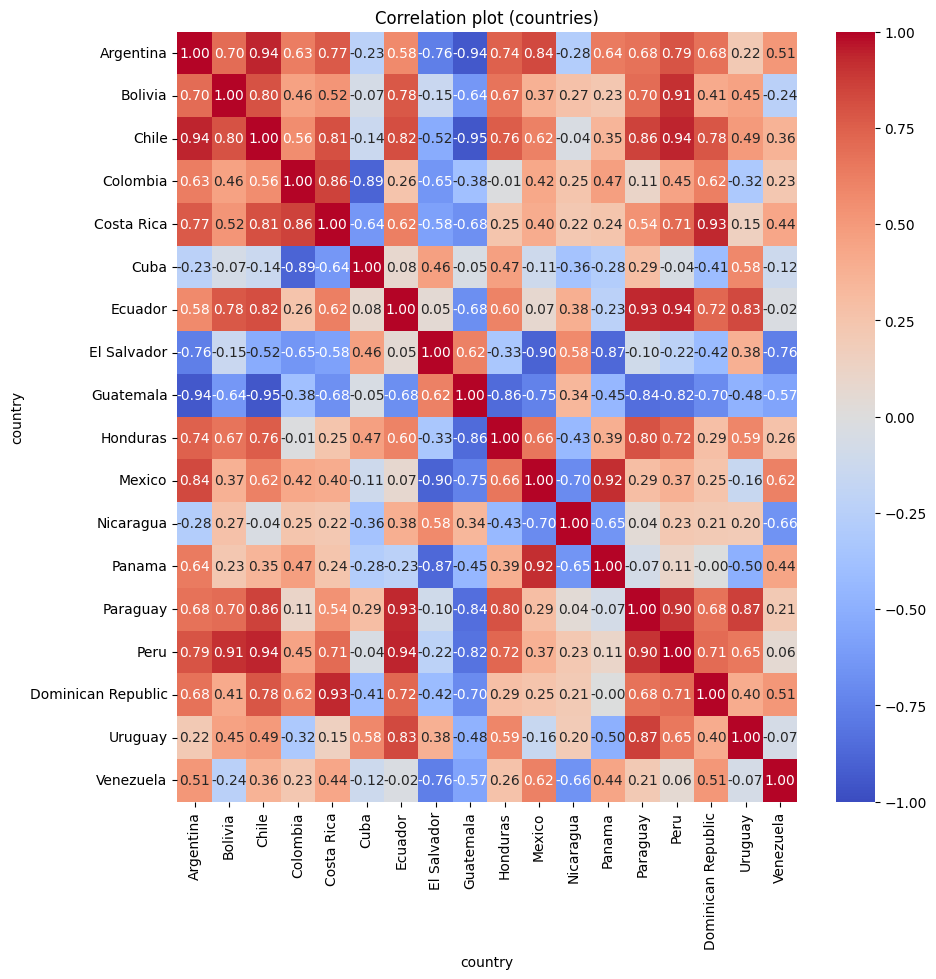

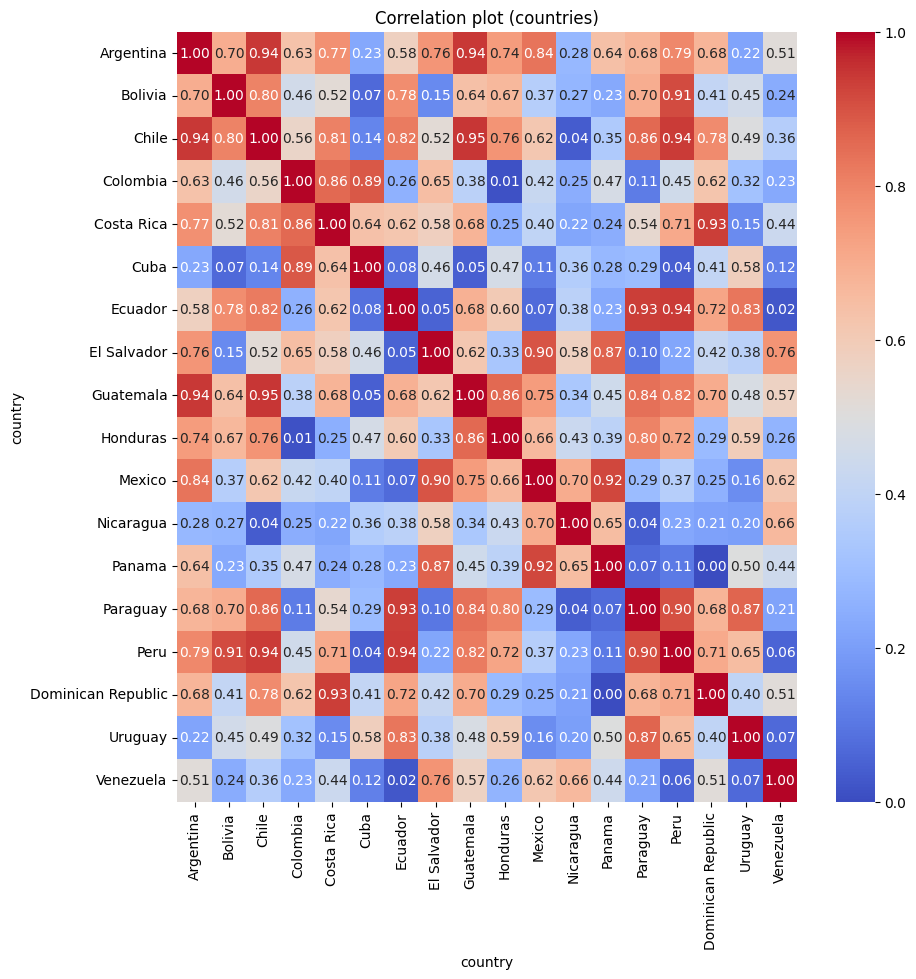

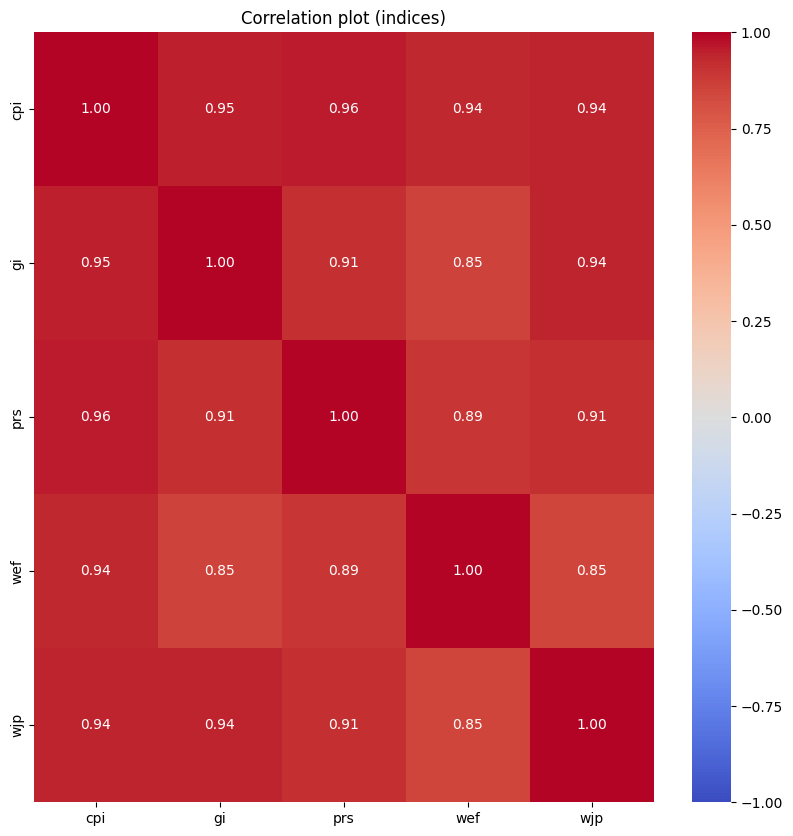

In [31]:
corr = df_cpi.T.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
#sns.heatmap(np.abs(corr), annot=True, cmap="coolwarm", vmin=0, vmax=1, fmt=".1f")
plt.title("Correlation plot (countries)")
plt.show()

plt.figure(figsize=(10,10))
#sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
sns.heatmap(np.abs(corr), annot=True, cmap="coolwarm", vmin=0, vmax=1, fmt=".2f")
plt.title("Correlation plot (countries)")
plt.show()

corrT = df_cpi.corr()

plt.figure(figsize=(10,10))
#sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
sns.heatmap(corrT, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation plot (indices)")
plt.show()

In [22]:
type(corr)

pandas.core.frame.DataFrame